# Data Reading

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting colab with google drive to access the csv from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the file

cars = pd.read_csv("/content/drive/MyDrive/CarPrices.csv")

# EDA

In [4]:
# Reading head

cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking number of rows and columns 

cars.shape

(205, 26)

In [6]:
# Checking datatypes

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Checking null values

cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Checking unique values

cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [9]:
# Analyzing statistics on features

cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Text(0.5, 1.0, 'Car price data distribution')

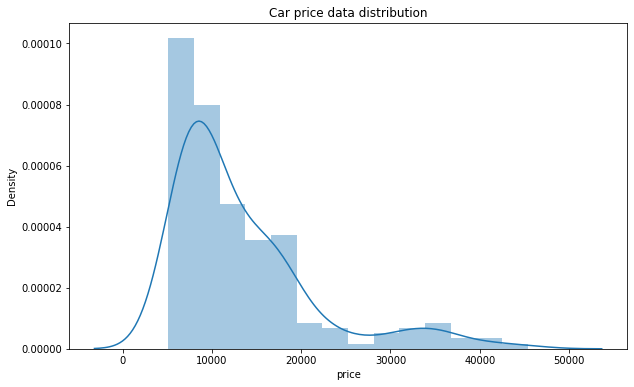

In [10]:
# Analysing distribution of target variable - Price

fig=plt.figure(figsize=(10,6))
sns.distplot(cars['price'])
plt.title("Car price data distribution")

In [11]:
# Separating numerical and categorical features

numerical_features=[col for col in cars if cars[col].dtype!='object']
categorical_features=[col for col in cars if col not in numerical_features]

In [12]:
print(numerical_features)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [13]:
print(categorical_features)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [14]:
# Checking to confirm if no feature is missed 

print(len(numerical_features) + len(categorical_features))

26


In [15]:
# Ignoring car_ID for plotting distribution

numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

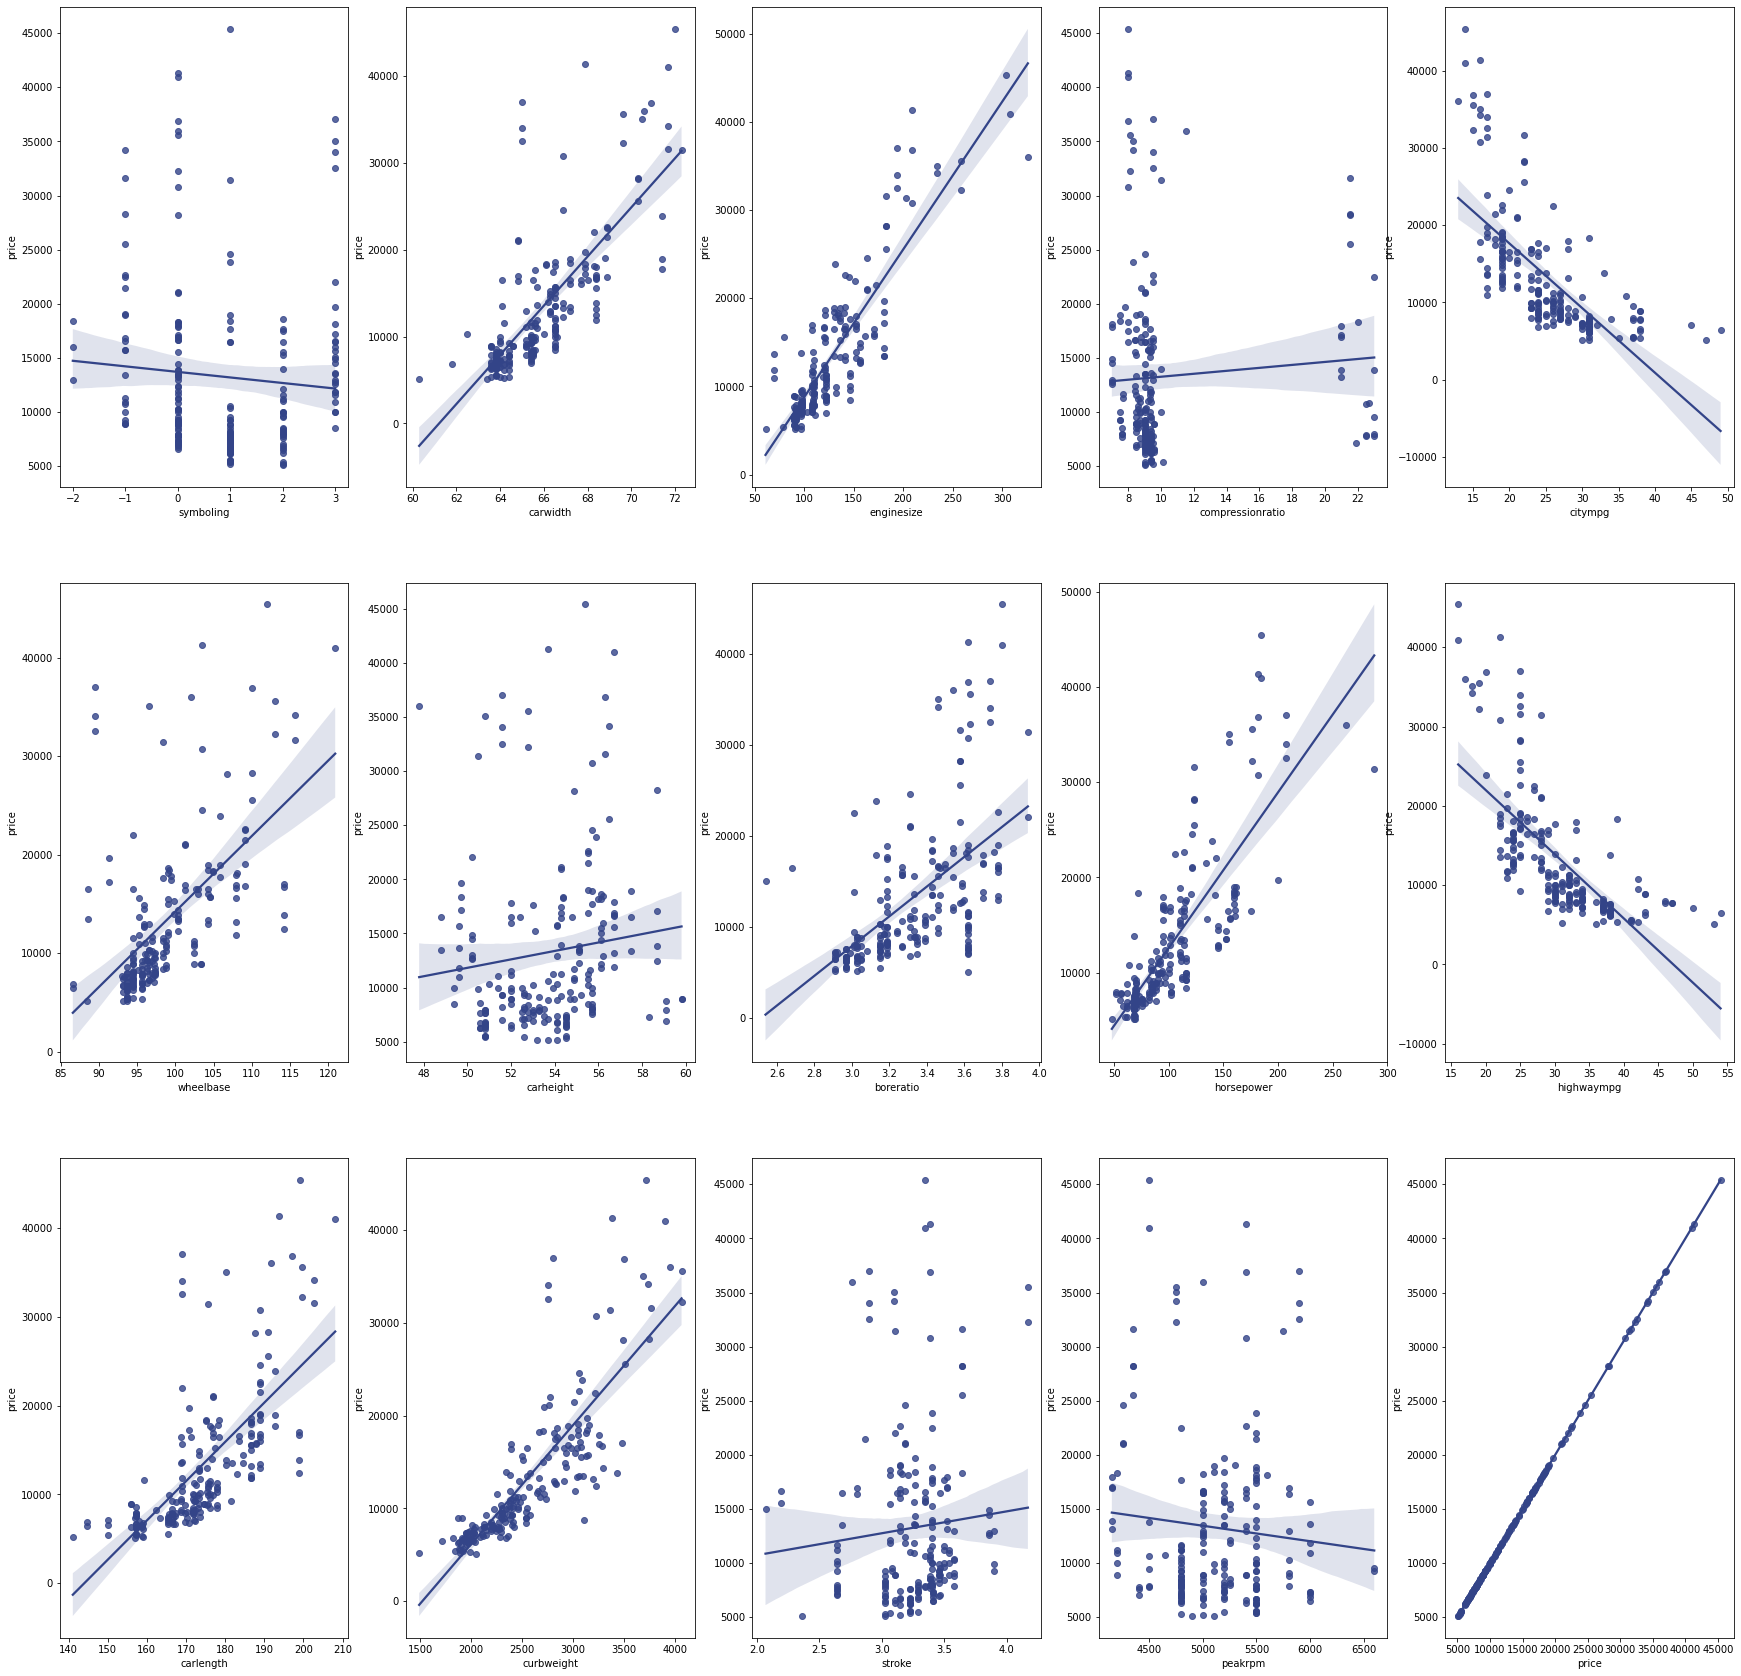

In [18]:
# Analyzing distribution of price w.r.t all numerical features

f, axes = plt.subplots(3,5, figsize=(30, 30))
for i, feature in enumerate(numerical_features):
    sns.regplot(data=cars, x = feature, y= "price",ax=axes[i%3, i//3], color="#334488")

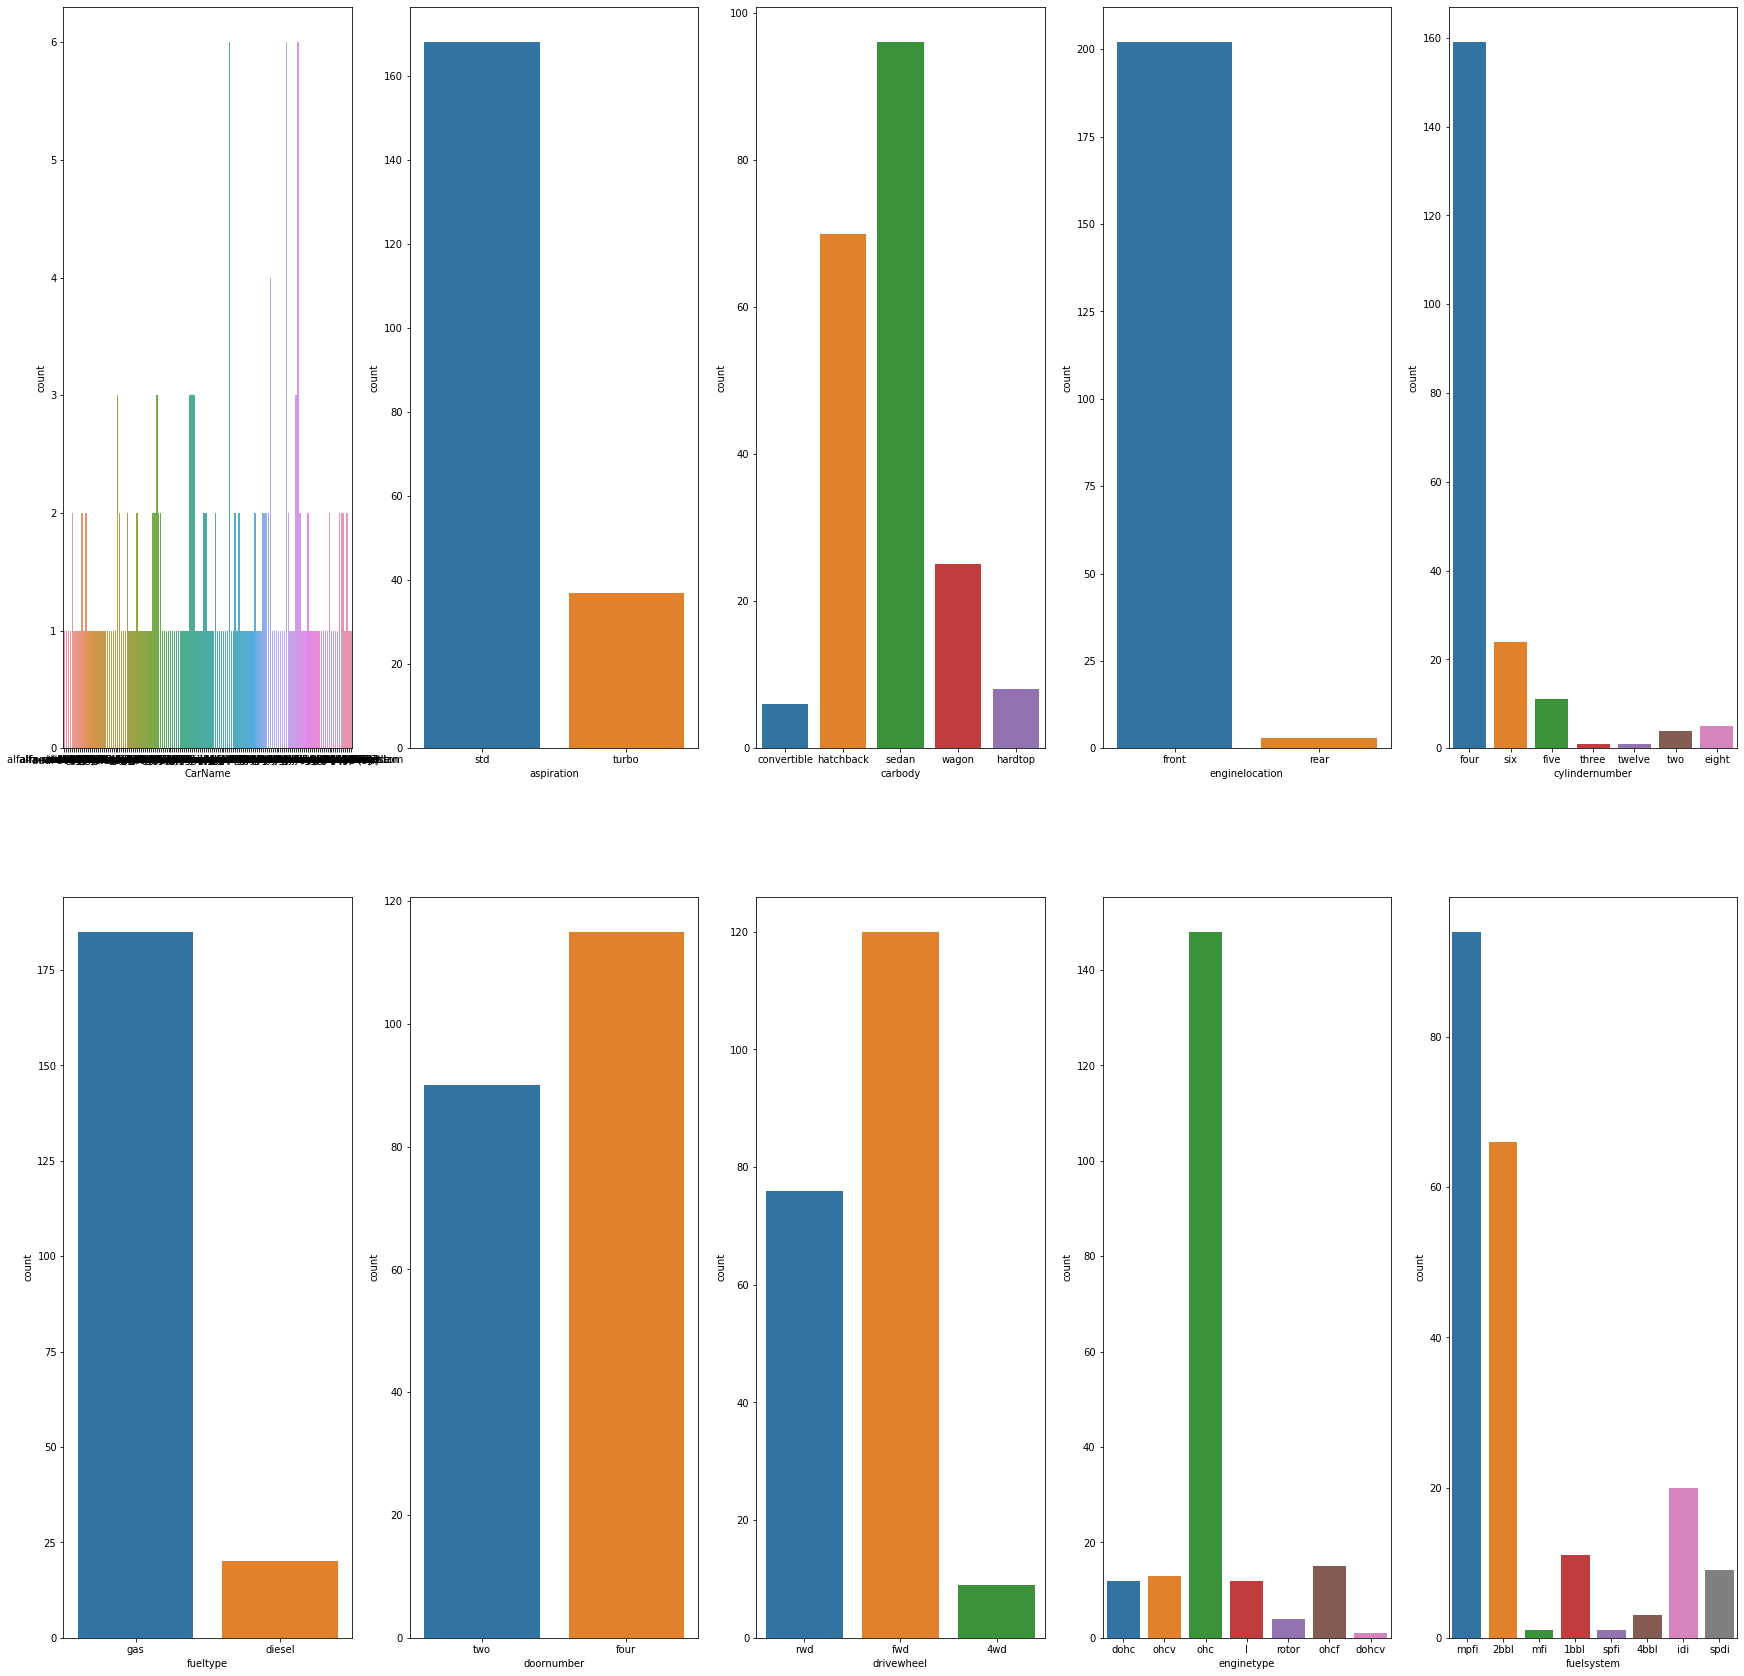

In [19]:
# Analyzing distribution of category columns

f, axes = plt.subplots(2,5 , figsize=(30, 30))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=cars,x=feature,ax=axes[i%2, i//2])

# Data Cleaning

In [20]:
# Take only brand name from the full car name

cars_ready=cars.copy()
df=cars_ready['CarName'].str.split(" ",n = 1, expand = True)
cars_ready['brand_name']=df[0]
cars_ready.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
# Dropping the original CarName column

cars_ready.drop('CarName', axis=1, inplace=True)

In [22]:
# Dropping the car_ID column

cars_ready.drop('car_ID', axis=1, inplace=True)

In [23]:
cars_ready.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
# Verifying all car brand names have proper values

cars_ready['brand_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
maxda           2
vw              2
renault         2
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Nissan          1
Name: brand_name, dtype: int64

In [25]:
# Many wrongly spelled brand names, correcting them

# Correction for Mazda

cars_ready.loc[(cars_ready.brand_name=='maxda'),'brand_name']='mazda'

# Correction for Volkswagen

cars_ready.loc[(cars_ready.brand_name=='vw'),'brand_name']='volkswagen'
cars_ready.loc[(cars_ready.brand_name=='vokswagen'),'brand_name']='volkswagen'

# Correction for Nissan

cars_ready.loc[(cars_ready.brand_name=='Nissan'),'brand_name']='nissan'

# Correction for Porsche

cars_ready.loc[(cars_ready.brand_name=='porcshce'),'brand_name']='porsche'

# Correction for Toyota

cars_ready.loc[(cars_ready.brand_name=='toyouta'),'brand_name']='toyota'


In [26]:
# Verifying corrected brand names

cars_ready['brand_name'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: brand_name, dtype: int64

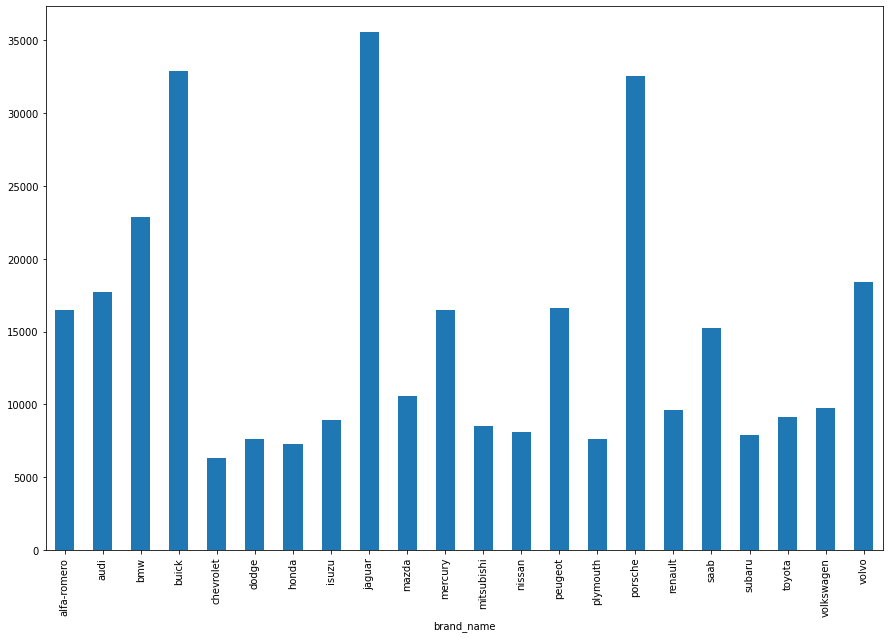

In [27]:
# Analyzing the relation between brand name and car price

plt.figure(figsize=(15,10))
cars_ready.groupby('brand_name')['price'].median().plot.bar()

# Feature Encoding

In [28]:
# Using Label Encoder for object values to numeric conversion 

from sklearn.preprocessing import LabelEncoder

cat_features = ['brand_name', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for feature in cat_features:
    le=LabelEncoder()
    cars_ready[feature]=le.fit_transform(cars_ready[feature])

In [29]:
cars_ready.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_name
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


# Model Building

In [30]:
# Splitting data into training and test

# Select Features
feature = cars_ready.drop('price', axis=1)

# Select Target
target = cars_ready['price']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=0)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (143, 24)
Shape of testing feature: (62, 24)
Shape of training label: (143,)
Shape of training label: (62,)


In [31]:
# Importing LinearRegression

from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Model Evaluation

In [33]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)
    errors = abs(y_pred - y_test)
    print('Errors:')
    print(errors)

    # Mean Absolute Percentage Error
    mape = 100 * np.mean(errors / y_test)
    print('Mean Absolute Percentage Error:')
    print(mape)

    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [34]:
lr_regressor=evaluate_model(lr,X_test,y_test)

Errors:
52      477.076152
181    1639.629558
5       715.625643
18     4252.967099
188     195.499562
          ...     
198    2638.258111
143     226.948222
24     3236.087944
30     3165.694058
135    2319.843112
Name: price, Length: 62, dtype: float64
Mean Absolute Percentage Error:
18.424334294189766
Model Performance
Average Error: 2298.1101 degrees.
Accuracy = 81.58%.


In [35]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('Mean Absolute error(MAE) is:', mae)
    print('Mean squared Error(MSE) is:', mse)
    print('Root Mean Squared error(RMSE) is:', rmse)
    print('R2 Square is:', r2_square)

In [38]:
test_pred = lr.predict(X_test)
train_pred =lr.predict(X_train)

print('Test set evaluation:\n_____________________________________________________\n')
print_evaluate(y_test, test_pred)
print('\nTrain set evaluation:\n_____________________________________________________\n')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________________________

Mean Absolute error(MAE) is: 2298.1100528272545
Mean squared Error(MSE) is: 11298685.41383499
Root Mean Squared error(RMSE) is: 3361.3517242078356
R2 Square is: 0.828904674276753

Train set evaluation:
_____________________________________________________

Mean Absolute error(MAE) is: 1759.3115520975189
Mean squared Error(MSE) is: 5230136.604998165
Root Mean Squared error(RMSE) is: 2286.9491916083675
R2 Square is: 0.9162012972662763
